In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')


Задание 1.Plot the populations for the years in the period. Add legend and axis labels to the plot.

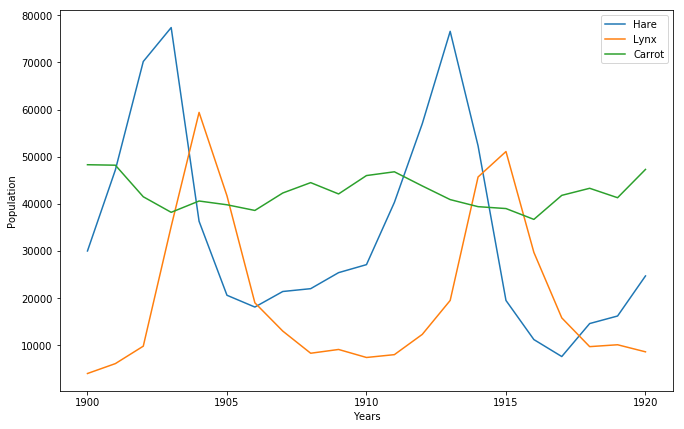

In [2]:
years = data[:, 0]

plt.figure(figsize=(11, 7))
plt.plot(years, data[:, 1], label = 'Hare')
plt.plot(years, data[:, 2], label = 'Lynx')
plt.plot(years, data[:, 3], label = 'Carrot')
plt.legend()
plt.xticks(years.astype(int) [::5])
plt.xlabel('Years')
plt.ylabel('Population')
plt.show()

Задание 2. 
Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

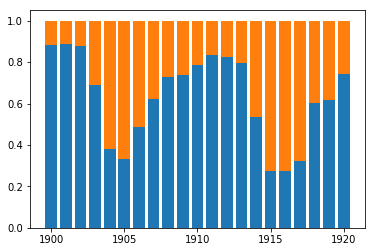

In [5]:
total = data[:, 1:3].sum(axis = 1)

plt.bar(years, data[:, 1] / total, label = 'Hare')
plt.bar(years, data[:, 2] / total, label = 'Lynx', bottom = data[:, 1] / total)

plt.show()

Задание 3.
Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

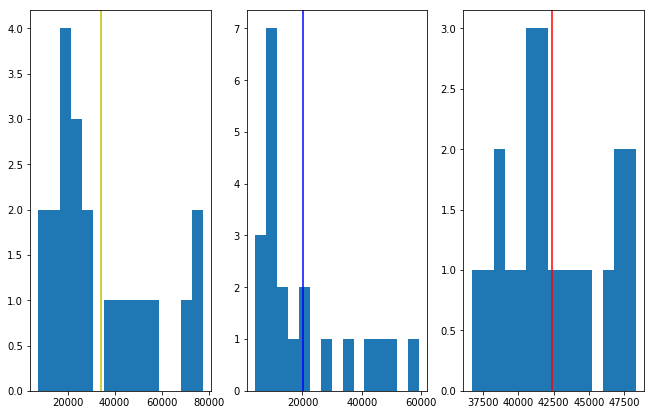

In [40]:
fig, ax = plt.subplots(1, 3, figsize = (11,7) )

ax[0].hist(data[:,1], bins = 15)
ax[0].axvline(data[:,1].mean(), c = 'y')

ax[1].hist(data[:,2], bins = 15)
ax[1].axvline(data[:,2].mean(), c = 'b')

ax[2].hist(data[:,3], bins = 15)
ax[2].axvline(data[:,3].mean(), c = 'r')
plt.show()

Задание 4. Find which year each species had the largest population. Mark these years in the plot of populations.

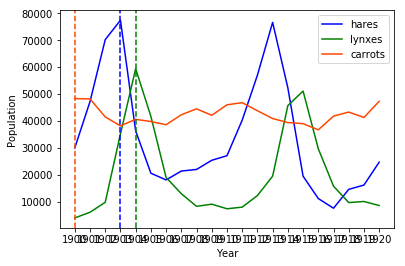

In [24]:
maximum = data[np.argmax(data, axis=0), 0]
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(0, 21), years.astype(int))
plt.plot(data[:,1], label = "hares", color='b')
plt.plot(data[:, 2], label = "lynxes", color='g')
plt.plot(data[:, 3], label = "carrots", color='orangered')
plt.axvline(x=maximum[1] % 1900, color='b', linestyle="dashed")
plt.axvline(x=maximum[2] % 1900, color='g', linestyle="dashed")
plt.axvline(x=maximum[3] % 1900, color='orangered', linestyle="dashed")
plt.legend()
plt.show()

Задание 5. Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


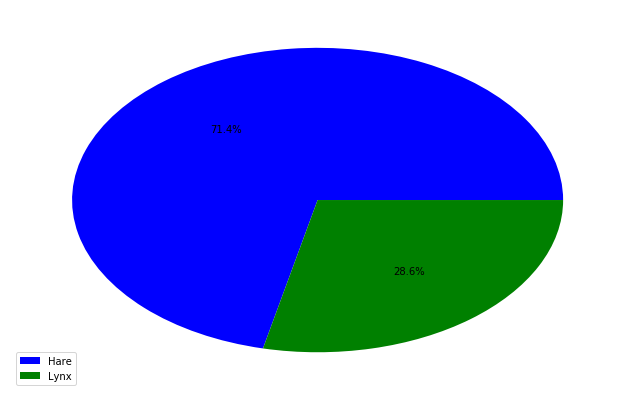

In [39]:
ans = np.full(data[:, 1].size, 'L')
ans[data[:, 1] > data[:, 2]] = 'H'
print(ans)

plt.figure(figsize=(11, 7))
plt.pie([(ans == 'H').sum(), (ans == 'L').sum()], colors = ('b', 'g'), autopct = '%1.1f%%')
plt.legend(['Hare', 'Lynx'])
plt.show()

Задание 6. Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

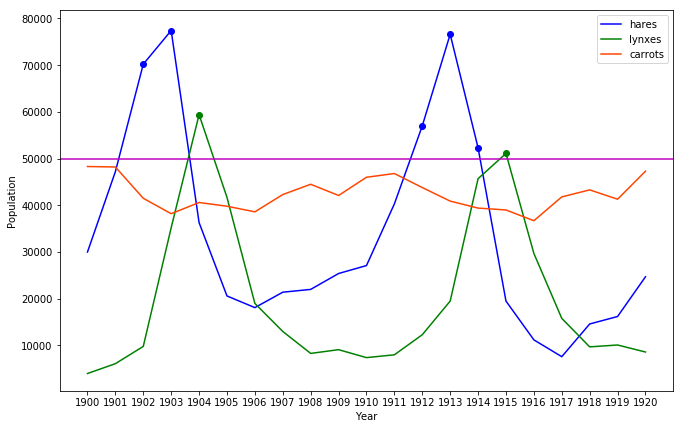

In [46]:
plt.figure(figsize=(11, 7))
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(0, 21), years.astype(int))
plt.plot(data[:,1], label = "hares", color='b')
plt.plot(data[:, 2], label = "lynxes", color='g')
plt.plot(data[:, 3], label = "carrots", color='orangered')
plt.axhline(y=50000, color='m')
plt.scatter(years[data[:, 1] > 50000] % 1900, data[:, 1] [data[:, 1] > 50000], color='b')
plt.scatter(years[data[:, 2] > 50000] % 1900, data[:, 2] [data[:, 2] > 50000], color='g')
plt.scatter(years[data[:, 3] > 50000] % 1900, data[:, 3] [data[:, 3] > 50000], color='orangered')
plt.legend()
plt.show()

Задание 7. Find the top 2 years for each species when they had the lowest populations.

In [53]:
a = np.argsort(data[:, 1])[0]+1900, np.argsort(data[:, 1])[1]+1900
b = np.argsort(data[:, 2])[0]+1900, np.argsort(data[:, 2])[1]+1900
c = np.argsort(data[:, 3])[0]+1900, np.argsort(data[:, 3])[1]+1900
print("Hares", a , "Lynxes", b, "Carrots", c)

Hares (1917, 1916) Lynxes (1900, 1901) Carrots (1916, 1903)


Задание 8. Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

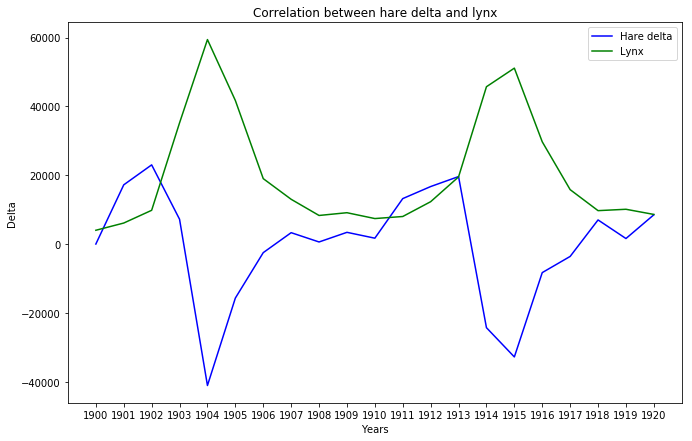

Correlation coefficient is -0.6933485156220878


In [71]:
plt.figure(figsize=(11, 7))
plt.title('Correlation between hare delta and lynx')
plt.xlabel('Years')
plt.ylabel('Delta')
plt.xticks(range(0, 21), years.astype(int))
plt.plot(years % 1900, np.hstack((np.array([0]), np.diff(data[:, 1]))), label = 'Hare delta', color = 'b')
plt.plot(data[:, 2], label = 'Lynx', color = 'g')
plt.legend()
plt.show()

print("Correlation coefficient is", np.corrcoef(np.diff(data[:, 1]), data[:-1, 2]) [0, 1])

Задание 9. Show population of hares vs carrots and hares vs lynxes.

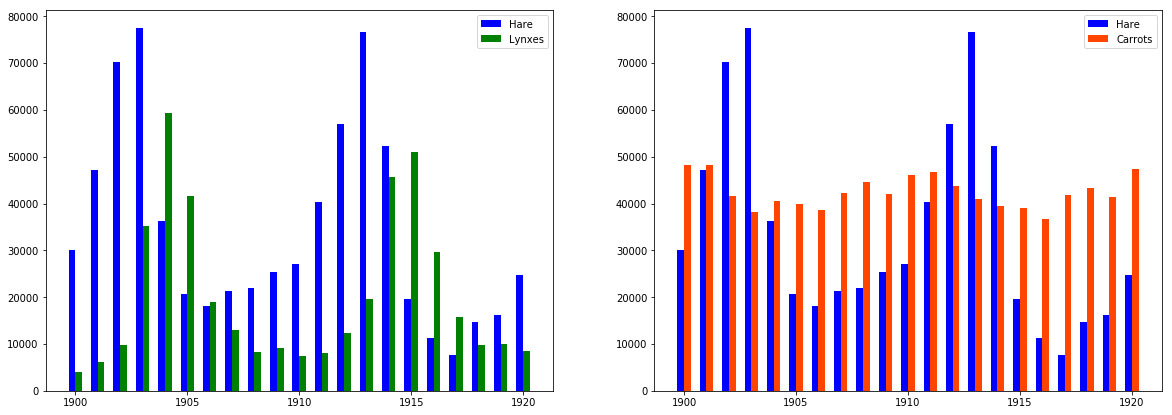

In [66]:
width=0.3
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].bar(years - width/2, data[:, 1], width, color='b', label='Hare')
ax[0].bar(years + width/2, data[:, 2], width, color='g', label='Lynxes')
ax[0].legend()

ax[1].bar(years - width/2, data[:, 1], width, color='b', label='Hare')
ax[1].bar(years + width/2, data[:, 3], width, color='orangered', label='Carrots')
ax[1].legend()
plt.show()

Задание 10. 
Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

Изменение количества зайцев и рыси в задании 8 относятся друг к другу противоположно и домноженно на коэффициент корреляции , это можно преддположить из пиков в 1904 и 1915 годах

In [83]:
e = -np.corrcoef(np.diff(data[:, 1]), data[:-1, 2]) [0, 1]
prediction = data[:, 1][19] + (data[:, 2][20])*e
print("Prediction", prediction)

err = (1 - prediction/data[:, 1][20])*100
print("Error v procentach", err, "%")

Prediction 22162.797234349957
Error v procentach 10.272075974291672 %
